In [12]:
import pandas as pd
import numpy as np

from scipy.fft import fft, fftfreq, ifft, fft2, ifft2, ifftshift
from scipy.signal import blackman
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy.signal import butter
from scipy import signal
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
from scipy.ndimage import gaussian_filter as gf

from xrdc import featurization as feat
from xrdc import fourier
from xrdc import visualization as vis
from xrdc.datasets import d3d


#pd.options.plotting.backend = "matplotlib"
pd.options.plotting.backend = "plotly"

In [6]:
from xrdc.utils.utils import utils

In [2]:
from xrdc import source_separation as sep
from xrdc import featurization as feat
from xrdc.datasets import d3d

from xrdc import peak_fitting as pf

from importlib import reload
reload(feat)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

In [3]:
# def annotate():
#     plt.xlabel('$q~(1 / A)$')
#     plt.ylabel('sample index')

# imargs = {'cmap': 'jet', 'aspect': 8}
# aspect = 8

# def heatmap(fig, arr, label = '', **kwargs):
#     ax = fig

#     stride = 100
#     qticks = d3d.q[::stride]
#     labels = ['{:0.1f}'.format(elt) for elt in qticks]
    
#     ax.set_xticklabels(labels);
#     ax.set_xticks(np.arange(len(qticks)) * stride);
#     if kwargs is not None:
#         (kwargs.update(imargs))
#     else:
#         kwargs = imargs
#     plt.imshow(arr, **kwargs)
#     plt.title(label)
#     annotate()
    
def norm(arr):
    return arr / arr.mean()

In [7]:
df = pd.read_csv(utils.resource_path("inputs/YijinXRD.dat"), sep = '\t')
qq = df.iloc[:, 0]

patterns = df.iloc[:, 2:]
patterns = (patterns.values.T)[:, 1:]

for i in range(len(patterns)):
    patterns[i] = patterns[i] - i * 1000
    
background_extra, _, _, _ = sep.separate_signal(patterns, background_after_filter = False,
                                                    threshold = 50, smooth_q = 1.7, bg_fill_method = 'simple',
                                                    smooth_q_background = 6)

# multiply normalized patterns by 1000 so that the peak-finding routine will play nice
patterns = m3d = 1000 * d3d.get_data().copy()[7, :, :]
#patterns = m3d_agglom# = m3d.reshape(15, 15, -1, 2).sum(axis = 3)

tmp = np.zeros_like(patterns)
tmp[:patterns.shape[0], :background_extra.shape[1]] = background_extra[:patterns.shape[0], :]
tmp = sep.CTinterpolation(tmp)

tmp *= (patterns.mean() / tmp.mean())

patterns = patterns + 2 * tmp

from xrdc import source_separation as sep
background, fast_q, slow_T, fast_T = sep.separate_signal(patterns, background_after_filter = True,
                                                    threshold = 50, smooth_q = 1.7, bg_fill_method = 'simple',
                                                    smooth_q_background = 6,
                                                    smooth_neighbor_background = 1)

import matplotlib
plt.rcParams["figure.figsize"]=(12, 12)
matplotlib.rcParams["figure.figsize"]=(12, 12)

%matplotlib inline
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

(0, 0)
(0, 0)


Calculate heatmap for visualization of peak shift correction

In [8]:
fsub_stop_2d = pf.curvefit_2d((patterns - 0), stdratio_threshold = 2, noise_estimate = fast_T,
                   background = background, bg_shift_pos = False)


numBlocks: 52, dataPts/Block: 15.384615384615385
[  0. 119. 170. 376. 431. 466. 580. 629. 653. 799.]
False
Experimental Info used: 

{'blockBounds_list': [[0.0, 119.0], [119.0, 170.0], [170.0, 376.0], [376.0, 431.0], [431.0, 466.0], [466.0, 580.0], [580.0, 629.0], [629.0, 653.0], [653.0, 799.0]]}
global background
[-1.39465688e-01 -1.11240776e-01 -8.53881881e-02 -5.01684937e-02
 -1.36333162e-02  6.41602099e-03  9.00909005e-03 -5.91673455e-05
 -3.46705754e-03 -3.33712408e-03 -9.94129331e-03 -9.44488672e-03
 -1.26662812e-02 -1.86806810e-02 -2.84472312e-02 -3.55589619e-02
 -2.65844033e-02 -9.33806872e-03  1.14283209e-02  1.56578755e-02
  1.29453922e-03 -1.33137753e-02 -2.41306360e-02 -3.61198086e-02
 -4.33339923e-02 -4.12484232e-02 -3.97438604e-02 -4.37511126e-02
 -4.48505325e-02 -4.15748050e-02 -4.88815338e-02 -5.49858021e-02
 -6.96818970e-02 -9.47866861e-02 -1.10028051e-01 -1.03219327e-01
 -8.98306784e-02 -7.68941599e-02 -7.37415139e-02 -6.98498232e-02
 -7.62813955e-02 -8.74375293e-02 -

Peak at 627, iteration 0: error = 0.09376030509872198
1.1393458357237103
bounds ([577.6, -0.40194447458499805, 0, 0, 0], [630.4, inf, inf, 48.0, 48.0])
[580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597
 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615
 616 617 618 619 620 621 622 623 624 625 626 627 628]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 651, start iteration with error = 0.2774951305504843
3.524744439572029
[629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646
 647 648 649 650 651 652]
Peak at 651, iteration 0: error = 0.11837041062442293
1.2010968603922492
bounds ([627.85, -0.4341995300448507, 0, 0, 0], [653.15, inf, inf, 23.0, 23.0])
[629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646
 647 648 649 650 651 652]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 741, start iteration with error = 0.41513686543316564
2.8382398673311524
[653 654 655 656 657 658 659 660 661 662 663 664 665 

Peak at 68, iteration 1: error = 0.05887240375721704
bounds ([-4.8500000000000005, -3.047330682421852, 0, 0, 0, -4.8500000000000005, -3.047330682421852, 0, 0, 0], [123.85, inf, inf, 117.0, 117.0, 123.85, inf, inf, 117.0, 117.0])
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 125, start iteration with error = 0.43978974752883926
45.697597553896905
[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 1

Peak at 627, iteration 0: error = 0.07085362819871509
5.557157716658849
[582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599
 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617
 618 619 620 621 622 623 624 625 626 627 628]
Peak at 627, iteration 1: error = 0.04634302260482315
bounds ([579.7, -0.4159879326184099, 0, 0, 0, 579.7, -0.4159879326184099, 0, 0, 0], [630.3, inf, inf, 46.0, 46.0, 630.3, inf, inf, 46.0, 46.0])
[582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599
 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617
 618 619 620 621 622 623 624 625 626 627 628]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 651, start iteration with error = 0.2727872192660454
22.30720543685585
[629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646
 647 648 649 650 651 652]
Peak at 651, iteration 0: error = 0.1416638203066357
8.351705724414591
[629 630 631 632 633 634 635 636 637 638 639 640 641 64

peak fit kwargs {'stdratio_threshold': 2}
Peak at 301, start iteration with error = 0.2068906168842409
27.541128576065447
[171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378]
Peak at 301, iteration 0: error =

/home/ollie/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak at 742, iteration 1: error = 0.06513857913572339
bounds ([646.8, -1.541448414506084, 0, 0, 0, 646.8, -1.541448414506084, 0, 0, 0], [805.2, inf, inf, 144.0, 144.0, 805.2, inf, inf, 144.0, 144.0])
[654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671
 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689
 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707
 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725
 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743
 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761
 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779
 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797
 798]
    ----Saving data for block between 1.00 - 118.00
    ----Saving data for block between 119.00 - 170.00
    ----Saving data for block between 171.00 - 378.00
    ----Saving data for block between 379.00 - 429

peak fit kwargs {'stdratio_threshold': 2}
Peak at 125, start iteration with error = 0.37218052776924576
20.39470781114396
[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170]
Peak at 125, iteration 0: error = 0.18645756417876028
2.326922394682944
[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170]
Peak at 125, iteration 1: error = 0.09127181633395193
bounds ([116.45, -2.2830973863053385, 0, 0, 0, 116.45, -2.2830973863053385, 0, 0, 0], [172.55, inf, inf, 51.0, 51.0, 172.55, inf, inf, 51.0, 51.0])
[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 1

Peak at 68, iteration 1: error = 0.06168889231560639
bounds ([-4.8500000000000005, -2.7988016503205086, 0, 0, 0, -4.8500000000000005, -2.7988016503205086, 0, 0, 0], [123.85, inf, inf, 117.0, 117.0, 123.85, inf, inf, 117.0, 117.0])
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 125, start iteration with error = 0.30247982819928204
14.844632490128793
[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159

Peak at 68, iteration 1: error = 0.07151504834583831
bounds ([-4.8500000000000005, -2.5572311024161776, 0, 0, 0, -4.8500000000000005, -2.5572311024161776, 0, 0, 0], [123.85, inf, inf, 117.0, 117.0, 123.85, inf, inf, 117.0, 117.0])
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 125, start iteration with error = 0.30558462390280283
37.715885833365455
[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154]
Peak at 125, iterat

peak fit kwargs {'stdratio_threshold': 2}
Peak at 301, start iteration with error = 0.24059775170554187
17.390164365420237
[160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 

peak fit kwargs {'stdratio_threshold': 2}
Peak at 124, start iteration with error = 0.3235221798007885
8.263185358735774
[118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148]
Peak at 124, iteration 0: error = 0.11651316370441452
0.842315692945912
bounds ([116.5, -0.8669059709487568, 0, 0, 0], [149.5, inf, inf, 30.0, 30.0])
[118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 300, start iteration with error = 0.27184200542764414
16.126992121740788
[149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235

Peak at 66, iteration 0: error = 0.3224067844072723
10.051978508957587
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
Peak at 66, iteration 1: error = 0.07170736620453531
bounds ([-6.2, -1.4699886041164567, 0, 0, 0, -6.2, -1.4699886041164567, 0, 0, 0], [152.2, inf, inf, 144.0, 144.0, 152.2, inf, inf, 144.0, 144.0])
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  3

    ----Saving data for block between 1.00 - 145.00
    ----Saving data for block between 146.00 - 377.00
    ----Saving data for block between 378.00 - 520.00
    ----Saving data for block between 521.00 - 614.00
    ----Saving data for block between 615.00 - 798.00
done
numBlocks: 26, dataPts/Block: 30.76923076923077
[  0. 145. 311. 515. 677. 799.]
False
Experimental Info used: 

{'blockBounds_list': [[0.0, 145.0], [145.0, 311.0], [311.0, 515.0], [515.0, 677.0], [677.0, 799.0]]}
global background
[-1.13057943e-01 -6.47817128e-02 -4.07859725e-02 -2.08072117e-02
  5.07292366e-03  2.86813634e-02  4.46668639e-02  5.50399936e-02
  7.13148084e-02  7.41452415e-02  6.61366972e-02  4.32684419e-02
  2.83015743e-02  1.25850714e-02  2.22514877e-03  9.67848147e-03
  1.09945767e-02  5.22390135e-03 -1.01110438e-02 -2.78837706e-02
 -2.57738584e-02 -2.13388280e-02 -2.67960388e-02 -3.06866807e-02
 -4.42571815e-02 -5.38626589e-02 -6.06409604e-02 -6.22151555e-02
 -6.66311671e-02 -6.74173566e-02 -7.02391

peak fit kwargs {'stdratio_threshold': 2}
Peak at 403, start iteration with error = 0.12759680842166707
13.338862901306806
[311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346
 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364
 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400
 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472
 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490
 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508
 509 510 511 512 513 514]
Peak at 403, iteration 0: error = 0.076061248400

Peak at 388, iteration 1: error = 0.051150735983820965
bounds ([373.5, -0.18848248627349995, 0, 0, 0, 373.5, -0.18848248627349995, 0, 0, 0], [450.5, inf, inf, 70.0, 70.0, 450.5, inf, inf, 70.0, 70.0])
[377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430
 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 525, start iteration with error = 0.20676125163424441
23.24201549350504
[448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465
 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483
 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 539 540 541 542 54

Peak at 712, iteration 0: error = 0.09932579972270553
1.9484991286088318
bounds ([538.65, -1.3082630923812606, 0, 0, 0], [810.35, inf, inf, 247.0, 247.0])
[551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568
 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586
 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604
 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622
 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640
 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658
 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676
 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694
 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712
 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730
 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748
 749 750 751 752 753 754 755 756 757 758 7

Peak at 526, iteration 1: error = 0.020997655567254744
bounds ([441.35, -0.7931536139125198, 0, 0, 0, 441.35, -0.7931536139125198, 0, 0, 0], [675.65, inf, inf, 213.0, 213.0, 675.65, inf, inf, 213.0, 213.0])
[452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469
 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505
 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523
 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541
 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559
 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577
 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595
 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613
 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631
 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 64

Peak at 387, iteration 0: error = 0.023917691107704985
1.0704467619657771
bounds ([369.95, -0.22348557301737038, 0, 0, 0], [437.05, inf, inf, 61.0, 61.0])
[373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390
 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408
 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426
 427 428 429 430 431 432 433 434]
peak fit kwargs {'stdratio_threshold': 2}
Peak at 528, start iteration with error = 0.16578097023415017
20.072279177414828
[435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452
 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470
 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488
 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506
 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524
 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542
 543 544 545 546 547 548 549 55

Peak at 285, iteration 0: error = 0.1794981431049776
0.1636423481813647
bounds ([137.9, -6.560559765878435, 0, 0, 0], [382.1, inf, inf, 222.0, 222.0])
[149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346
 347 348 349 350 351 352 353 354 355 356 357 3

In [9]:
reload(feat)

<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

In [16]:
def pp_features(activations):
    act_min = activations.copy()
    idxzero = np.where((act_min == 0))
    iizero = idxzero[0]
    act_min[act_min == 0] = np.inf
    mins = act_min.min(axis = -1)
    # TODO move this into feat.peakfit_featurize if it's going to be the standard transformation
    activations_n1 = feat.norm(activations + mins[:, None] / 10, 1)
    return activations_n1

Peak at 300, start iteration with error = 0.2311533672318439
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 23

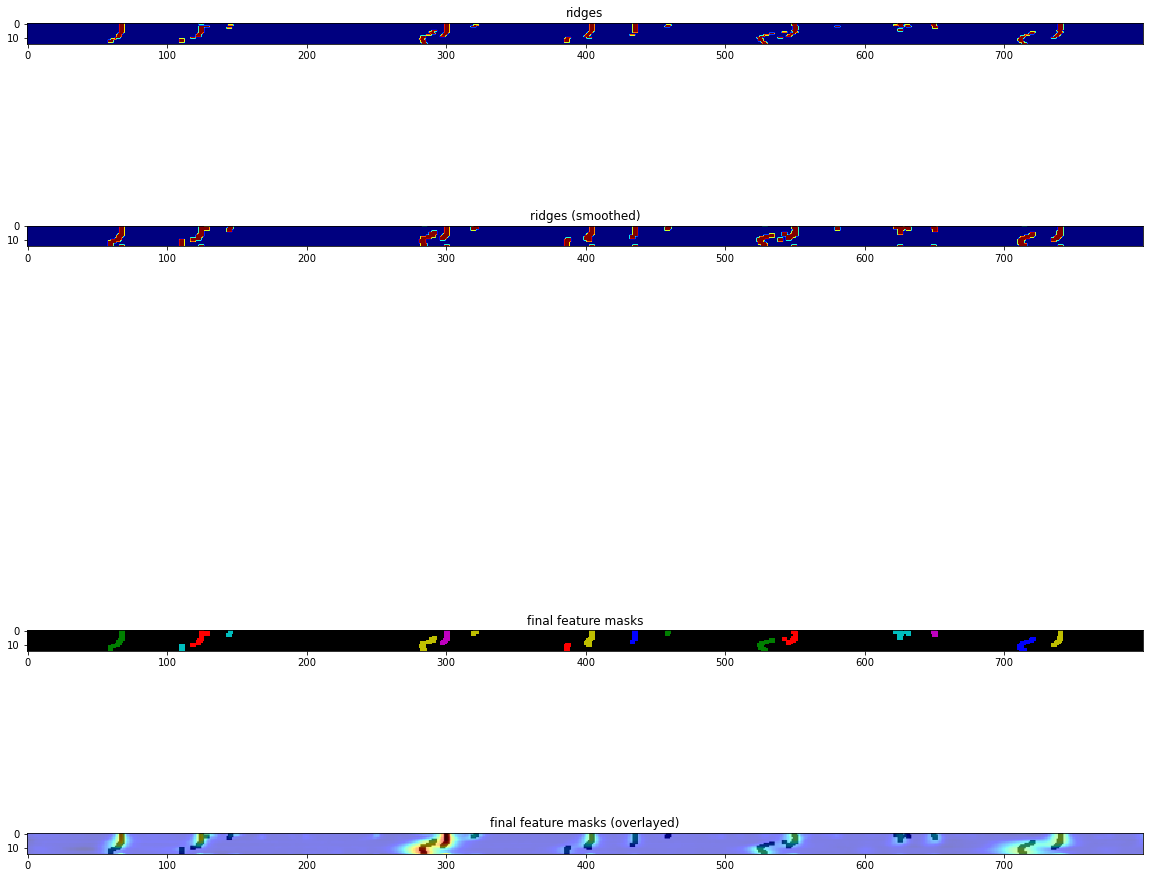

In [10]:
patterns_pp = fast_q - fast_q.min()
patterns_pp /= patterns_pp.mean()
fitlists = fsub_stop_2d[1]
labeled, feature_masks, activations, norm_, activations_n1 = feat.peakfit_featurize(patterns_pp, fitlists,
                                                                    size_thresh = 3, fwhm_max = 140)

straightened_heatmap = feat.get_peakshift_corrected_heatmap(patterns, activations, labeled)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/visualization.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels);


0.17600812396378065


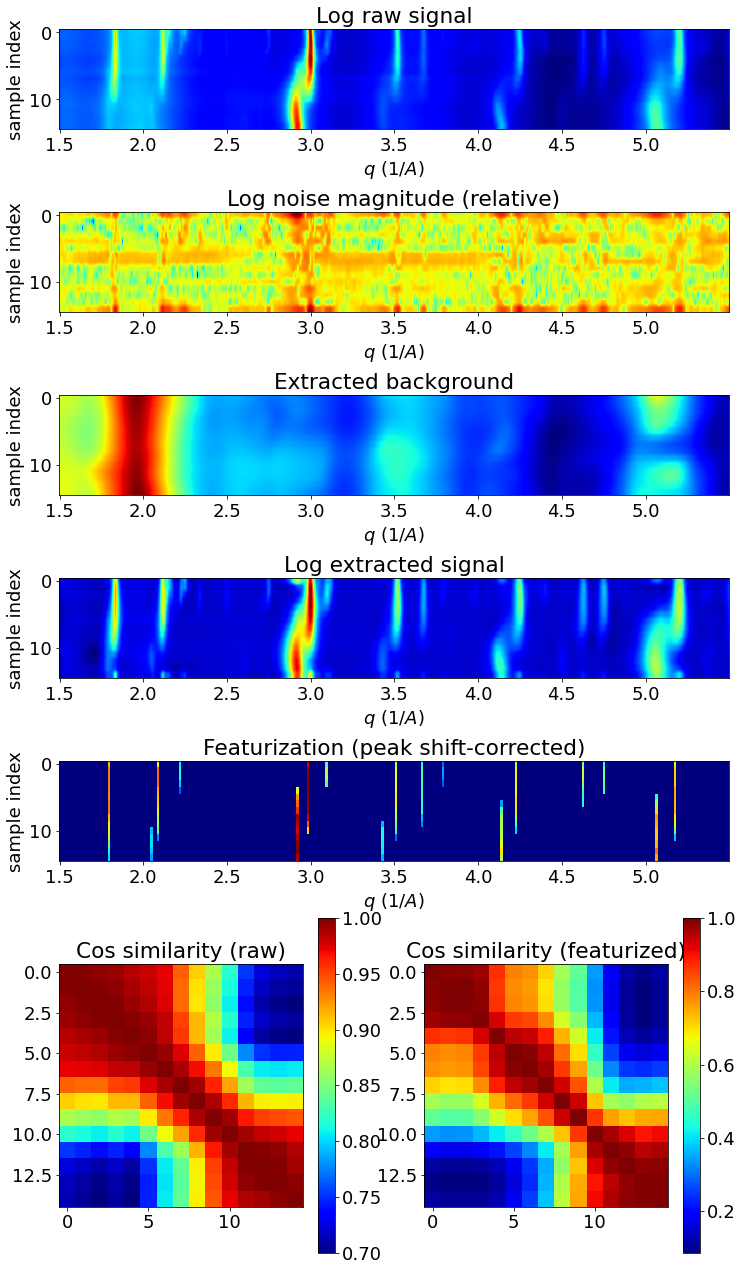

In [17]:
matplotlib.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(12, 23), constrained_layout=False)
spec = fig.add_gridspec(7, 2)

imargs = {'cmap': 'jet', 'aspect': 8}

ax0 = fig.add_subplot(spec[0, :])
vis.heatmap(ax0, np.log(1 + norm(patterns)), label = 'Log raw signal')
# annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[1, :])
vis.heatmap(ax1, np.log10(np.abs(fast_T / patterns) ), "Log noise magnitude (relative)")
#annotate_axes(ax10, 'ax10')


ax2 = fig.add_subplot(spec[2, :])
vis.heatmap(ax2, background, 'Extracted background')
# plt.title("Log signal")

ax3 = fig.add_subplot(spec[3, :])
#heatmap(ax3, np.log(1 + norm(fast_q - fast_q.min())))
vis.heatmap(ax3, np.log(1 + norm((slow_T - background) - (slow_T - background).min())), "Log extracted signal")
# annotate_axes(ax11, 'ax11')

ax4 = fig.add_subplot(spec[4, :])
vis.heatmap(ax4, np.log(1 + straightened_heatmap), interpolation = 'none',
        label = 'Featurization (peak shift-corrected)')

imargs = {'cmap': 'jet', 'aspect': 1}

ax50 = fig.add_subplot(spec[5:7, 0])
img = ax50.imshow(feat.csim_pairs(patterns), cmap = 'jet')
plt.title('Cos similarity (raw)')
plt.colorbar(img, ax = ax50)

ax51 = fig.add_subplot(spec[5:7, 1])
img = ax51.imshow(feat.csim_pairs(pp_features(activations).T), cmap = 'jet')
plt.title('Cos similarity (featurized)')
plt.colorbar(img, ax = ax51)

# fig.suptitle('Manually added subplots, spanning a column')

/Users/ollie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


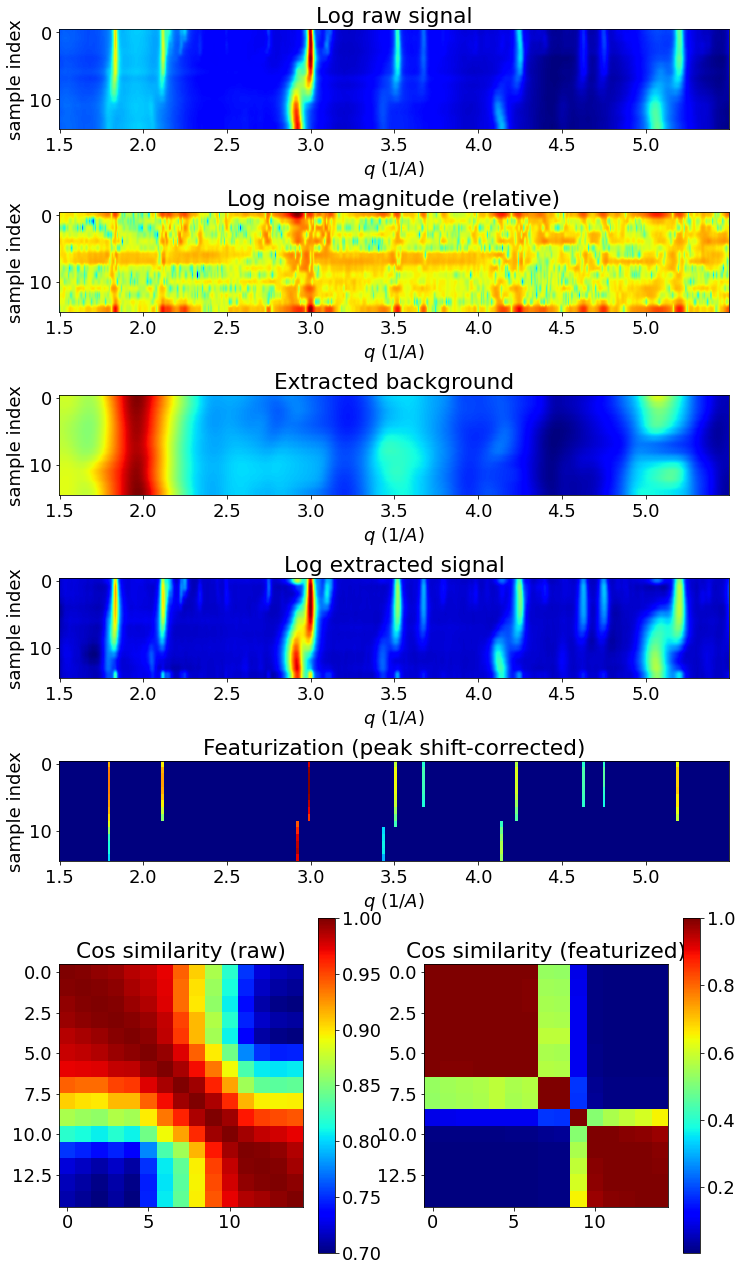

In [8]:
matplotlib.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(12, 23), constrained_layout=False)
spec = fig.add_gridspec(7, 2)

imargs = {'cmap': 'jet', 'aspect': 8}

ax0 = fig.add_subplot(spec[0, :])
heatmap(ax0, np.log(1 + norm(patterns)), label = 'Log raw signal')
# annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[1, :])
heatmap(ax1, np.log10(np.abs(fast_T / patterns) ), "Log noise magnitude (relative)")
#annotate_axes(ax10, 'ax10')


ax2 = fig.add_subplot(spec[2, :])
heatmap(ax2, background, 'Extracted background')
# plt.title("Log signal")

ax3 = fig.add_subplot(spec[3, :])
#heatmap(ax3, np.log(1 + norm(fast_q - fast_q.min())))
heatmap(ax3, np.log(1 + norm((slow_T - background) - (slow_T - background).min())), "Log extracted signal")
# annotate_axes(ax11, 'ax11')

ax4 = fig.add_subplot(spec[4, :])
heatmap(ax4, np.log(1 + straightened_heatmap), interpolation = 'none',
        label = 'Featurization (peak shift-corrected)')

imargs = {'cmap': 'jet', 'aspect': 1}

ax50 = fig.add_subplot(spec[5:7, 0])
img = ax50.imshow(feat.csim_pairs(patterns), cmap = 'jet')
plt.title('Cos similarity (raw)')
plt.colorbar(img, ax = ax50)

ax51 = fig.add_subplot(spec[5:7, 1])
img = ax51.imshow(feat.csim_pairs(activations_n1.T), cmap = 'jet')
plt.title('Cos similarity (featurized)')
plt.colorbar(img, ax = ax51)

# fig.suptitle('Manually added subplots, spanning a column')

In [15]:
from xrdc import visualization as vis

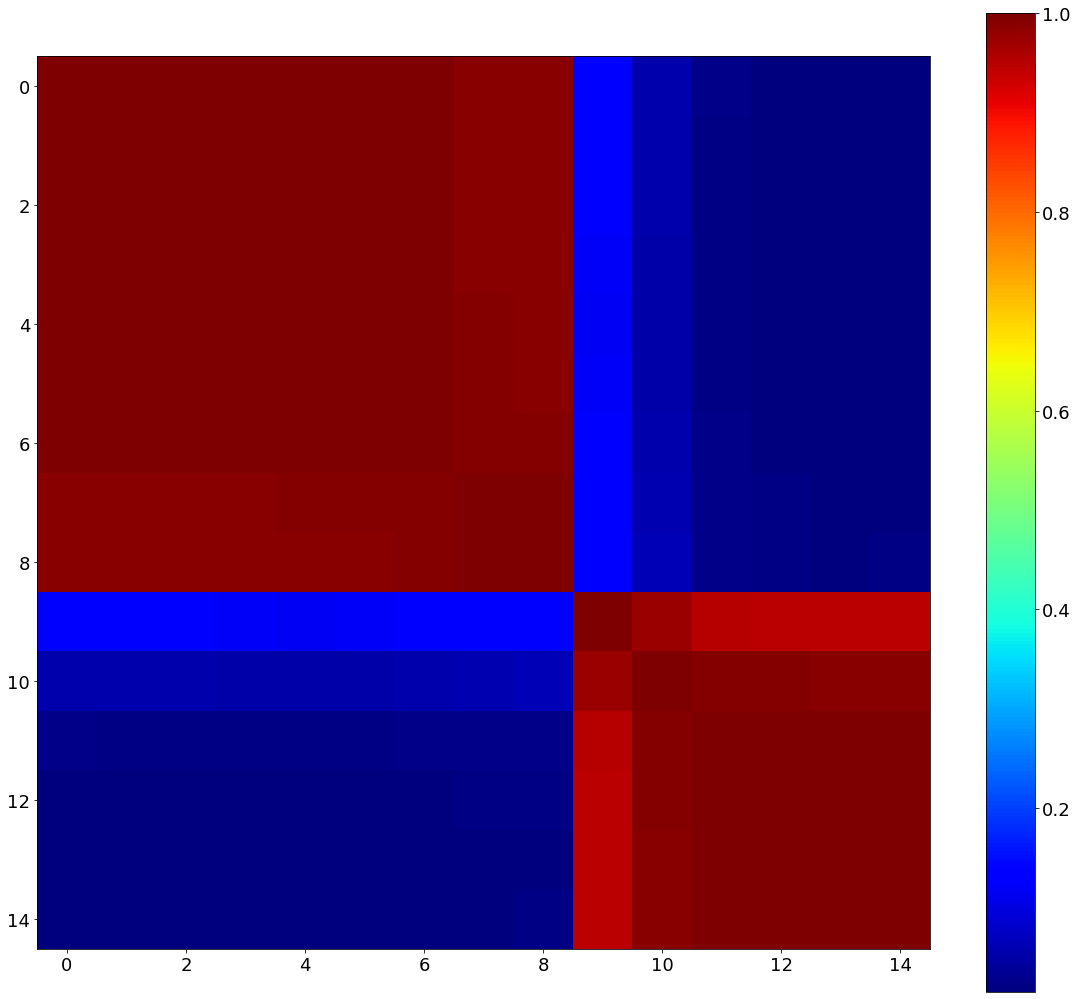

In [9]:
plt.imshow(feat.csim_pairs(activations.T), cmap = 'jet')
plt.colorbar()

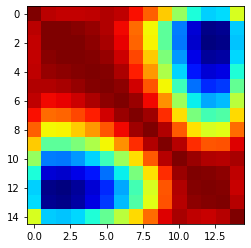

In [418]:
plt.imshow(feat.csim_pairs(((slow_T - background) - (slow_T - background).min())), cmap = 'jet')

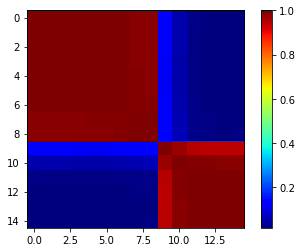

In [431]:
plt.imshow(feat.csim_pairs(activations.T), cmap = 'jet')
plt.colorbar()

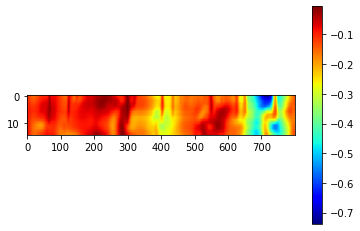

In [364]:
plt.imshow((2 * tmp - background) / patterns, cmap = 'jet', aspect = aspect)
plt.colorbar()

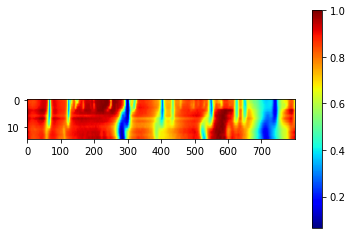

In [365]:
plt.imshow((2 * tmp) / patterns, cmap = 'jet', aspect = aspect)
plt.colorbar()

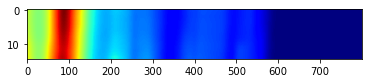

In [366]:
plt.imshow(tmp, cmap = 'jet', aspect = aspect)

/Users/ollie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


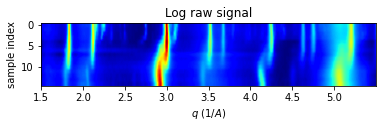

In [119]:
fig, ax = plt.subplots(1,1)
heatmap(fig, ax)

In [22]:
reload(vis)

<module 'xrdc.visualization' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/visualization.py'>

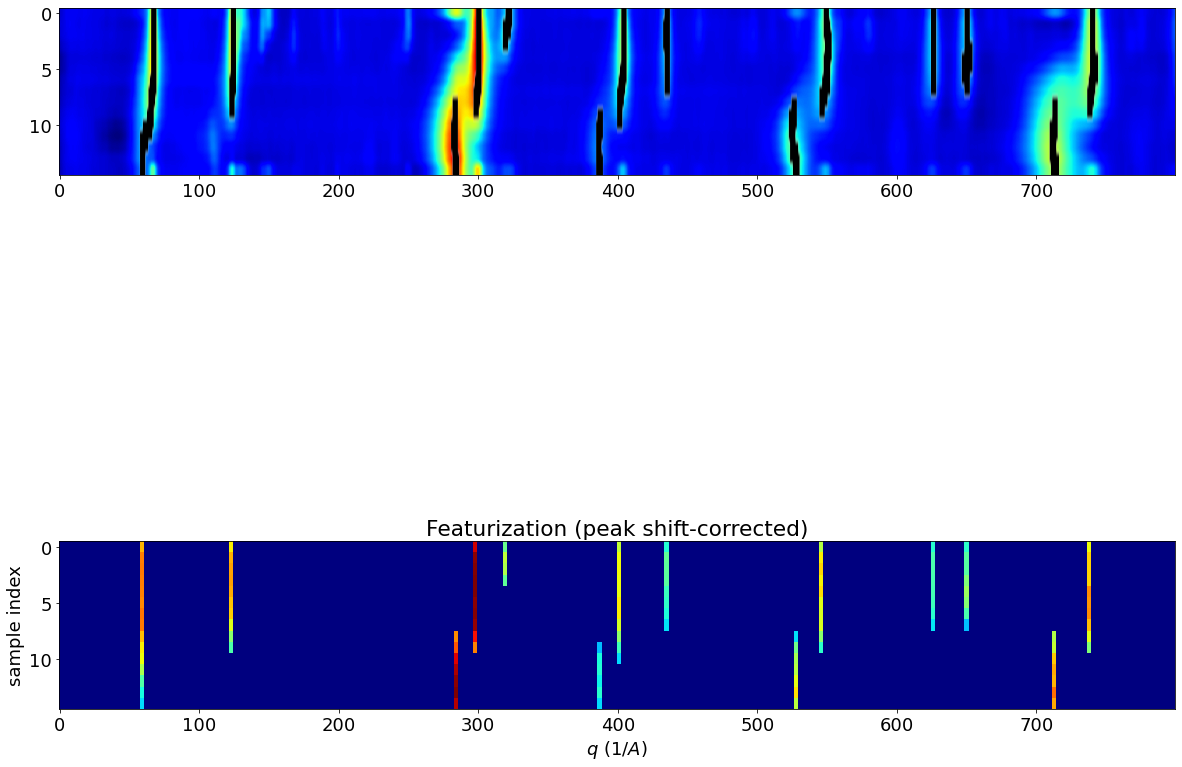

In [39]:
a, b = 2, 1
plt.subplot(a, b, 1)
vis.overlay_mask(fast_q, labeled.astype(bool).astype(float), aspect = 8)

plt.subplot(a, b, 2)
imargs = {'cmap': 'jet', 'aspect': 8}
heatmap(ax4, np.log(1 + straightened_heatmap), interpolation = 'none',
        label = 'Features (peak shift-corrected)')